In [8]:
from littlefish.visulization import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
simulation_folder = r"F:\little_fish_simulation_logs_8eyes_no_hidden"
min_generation = 49
max_generation = 56

population_size = 1000
turnover_rate = 0.6

mother_fish_num = int(population_size * (1 - turnover_rate))

In [10]:
life_span_df = plotting.collect_life_spans(
    simulation_folder,
    min_generation=min_generation,  # 0
    max_generation=max_generation,  # 25
)

reading generation_0000049, 1 / 8 ...
reading generation_0000050, 2 / 8 ...
reading generation_0000051, 3 / 8 ...
reading generation_0000052, 4 / 8 ...
reading generation_0000053, 5 / 8 ...
reading generation_0000054, 6 / 8 ...
reading generation_0000055, 7 / 8 ...
reading generation_0000056, 8 / 8 ...


In [11]:
life_span_df.sort_values(by="life_span")

,generation,fish_name,life_span,is_from_last_geneartion
5943,54,fish_241218_12_12_35.359331,22.6,False
3628,52,fish_241218_10_58_37.247168,27.6,False
4525,53,fish_241218_11_24_15.174232,31.3,False
4876,53,fish_241218_11_24_30.258427,32.4,False
3885,52,fish_241218_10_58_49.497230,33.4,False
...,...,...,...,...
1637,50,fish_241218_09_21_27.560319,2946.1,False
6551,55,fish_241218_12_37_11.968202,2963.3,False
424,49,fish_241218_08_28_56.510039,3011.4,False
6556,55,fish_241218_12_37_12.186458,3045.8,False


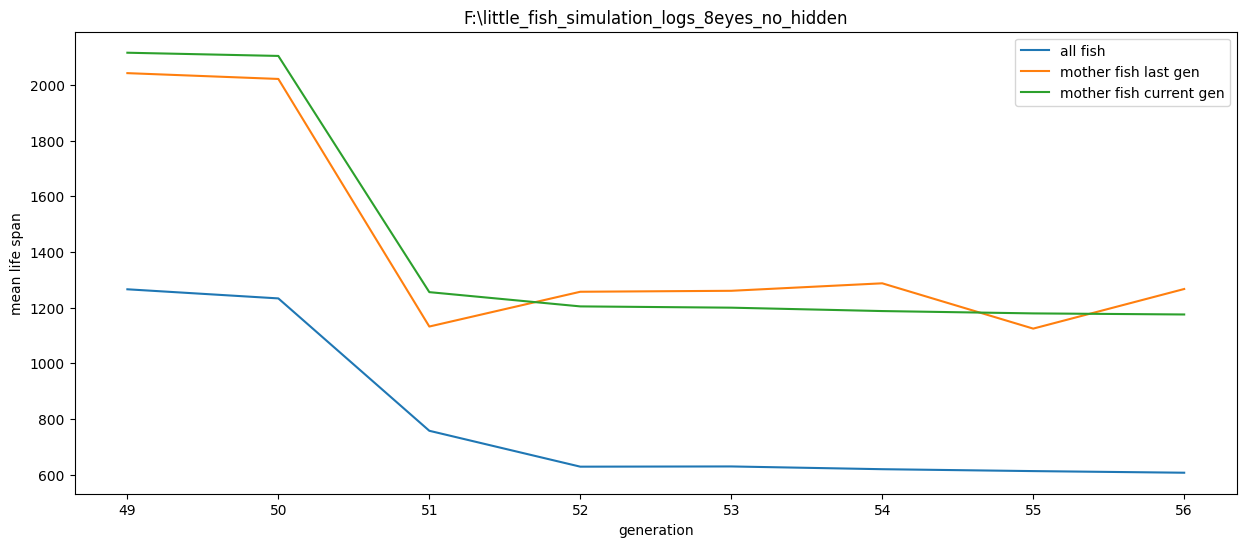

In [12]:
gens = sorted(life_span_df["generation"].unique())
mean_life_span = []
mean_mo_life_last_gen = []
mean_mo_life_curr_gen = []
for gen in gens:
    curr_life_span = sorted(life_span_df.query("generation == @gen")["life_span"])
    mean_life_span.append(np.mean(curr_life_span))
    mean_mo_life_last_gen.append(np.mean(life_span_df.query("generation == @gen and is_from_last_geneartion")["life_span"]))
    mean_mo_life_curr_gen.append(np.mean(curr_life_span[-mother_fish_num:]))

f, ax = plt.subplots(figsize=(15, 6))
ax.plot(gens, mean_life_span, label="all fish")
ax.plot(gens, mean_mo_life_last_gen, label="mother fish last gen")
ax.plot(gens, mean_mo_life_curr_gen, label="mother fish current gen")
ax.set_xlabel("generation")
ax.set_ylabel("mean life span")
ax.set_title(simulation_folder)
ax.legend()

(0.0, 4000.0)

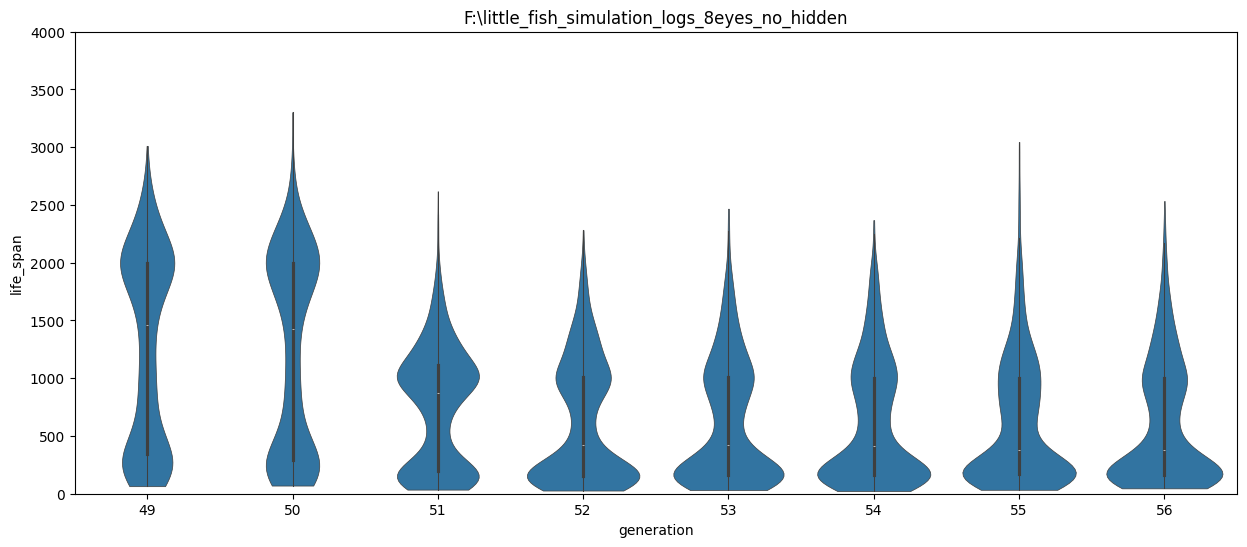

In [13]:
f, ax = plt.subplots(figsize=(15, 6))
ax.set_title(simulation_folder)
sns.violinplot(
    data=life_span_df, x="generation", y="life_span", ax=ax, cut=0, linewidth=0.5,
)
ax.set_ylim([0, 4000])

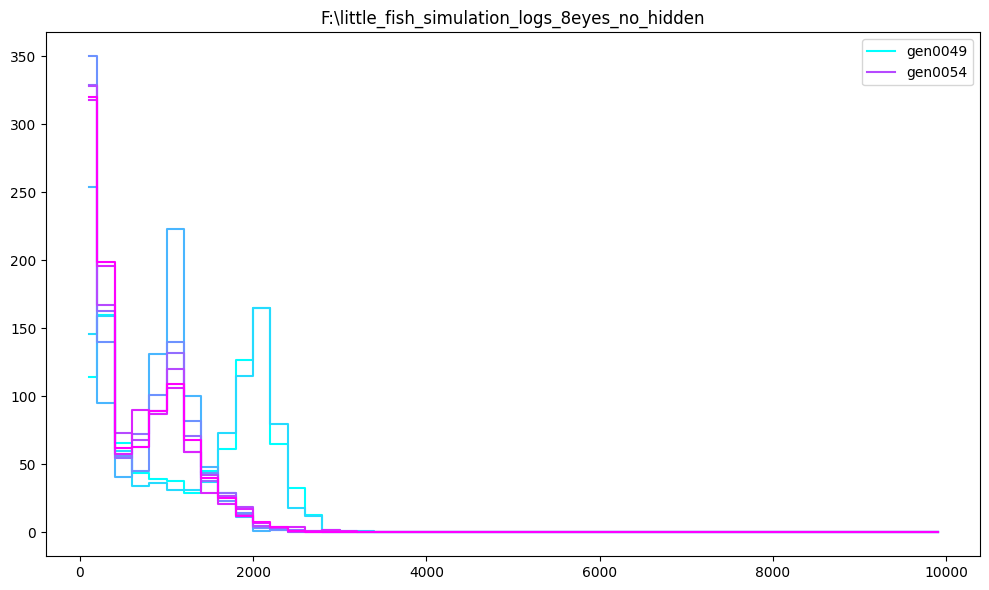

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_title(simulation_folder)
plotting.plot_simulation_life_spans(
    life_span_df, ax, max_life_span=10000, bins=50, legend_gap=5, 
)
ax.legend()
plt.tight_layout()